In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

link to the data: https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-0304010000_201/px-x-0304010000_201/px-x-0304010000_201.px


In [39]:
datapath = '/home/cyrill/dev/MASTER/vi-projet-inequality/data/12-22_suisse_sect26_tout_tout.csv'
df26 = pd.read_csv(datapath, sep=';', encoding='latin1')

# quick overview
print("Shape:", df26.shape)
print("\nColumn names:", df26.columns.tolist())
print("\nData types:", df26.dtypes)
print("\nMissing values:", df26.isnull().sum())

print("\n--- Sample Rows ---")
display(df26.head())

Shape: (720, 10)

Column names: ['Année', 'Grande région', 'Division économique', 'Position professionnelle', 'Sexe', 'Médiane', 'P10', 'P25', 'P75', 'P90']

Data types: Année                         int64
Grande région                object
Division économique          object
Position professionnelle     object
Sexe                         object
Médiane                     float64
P10                         float64
P25                         float64
P75                         float64
P90                         float64
dtype: object

Missing values: Année                        0
Grande région                0
Division économique          0
Position professionnelle     0
Sexe                         0
Médiane                     47
P10                         47
P25                         47
P75                         47
P90                         47
dtype: int64

--- Sample Rows ---


,Année,Grande région,Division économique,Position professionnelle,Sexe,Médiane,P10,P25,P75,P90
0,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Sexe - total,7365.0,4824.0,5779.0,9571.0,12464.0
1,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Femmes,6043.0,4286.0,4965.0,7824.0,10251.0
2,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Hommes,8073.0,5458.0,6500.0,10295.0,13362.0
3,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Sexe - total,12787.0,8017.0,9838.0,17098.0,24351.0
4,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Femmes,11911.0,6500.0,8720.0,16232.0,22738.0


In [40]:
# Convert data of type object to numeric
num_cols = ['Médiane', 'P10', 'P25', 'P75', 'P90']
for col in num_cols:
    df26[col] = pd.to_numeric(df26[col], errors="coerce").convert_dtypes()
    
print("\nNumeric conversion check:\n", df26[num_cols].dtypes)




Numeric conversion check:
 Médiane    Int64
P10        Int64
P25        Int64
P75        Int64
P90        Int64
dtype: object


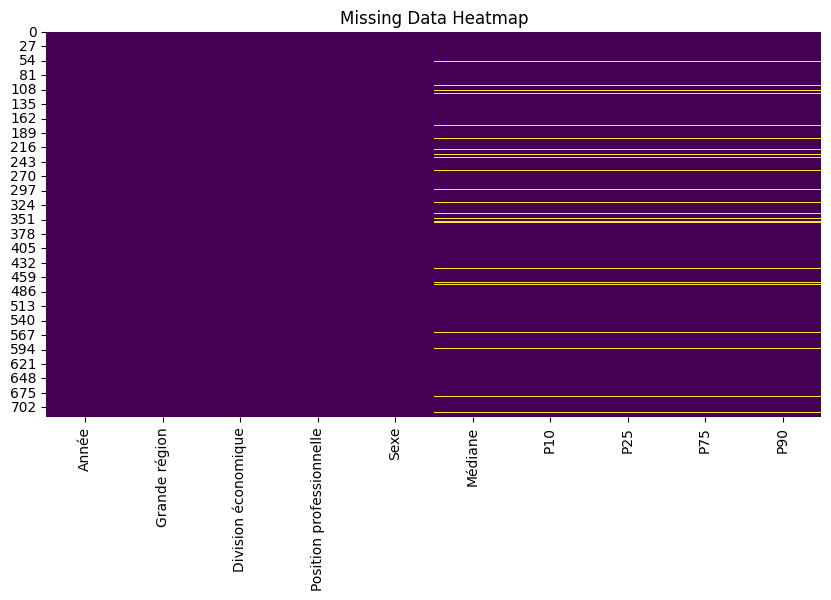

In [ ]:
# --- 6. Missing Data Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(df26.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

Text(0.5, 1.0, 'Median Salary by Year')

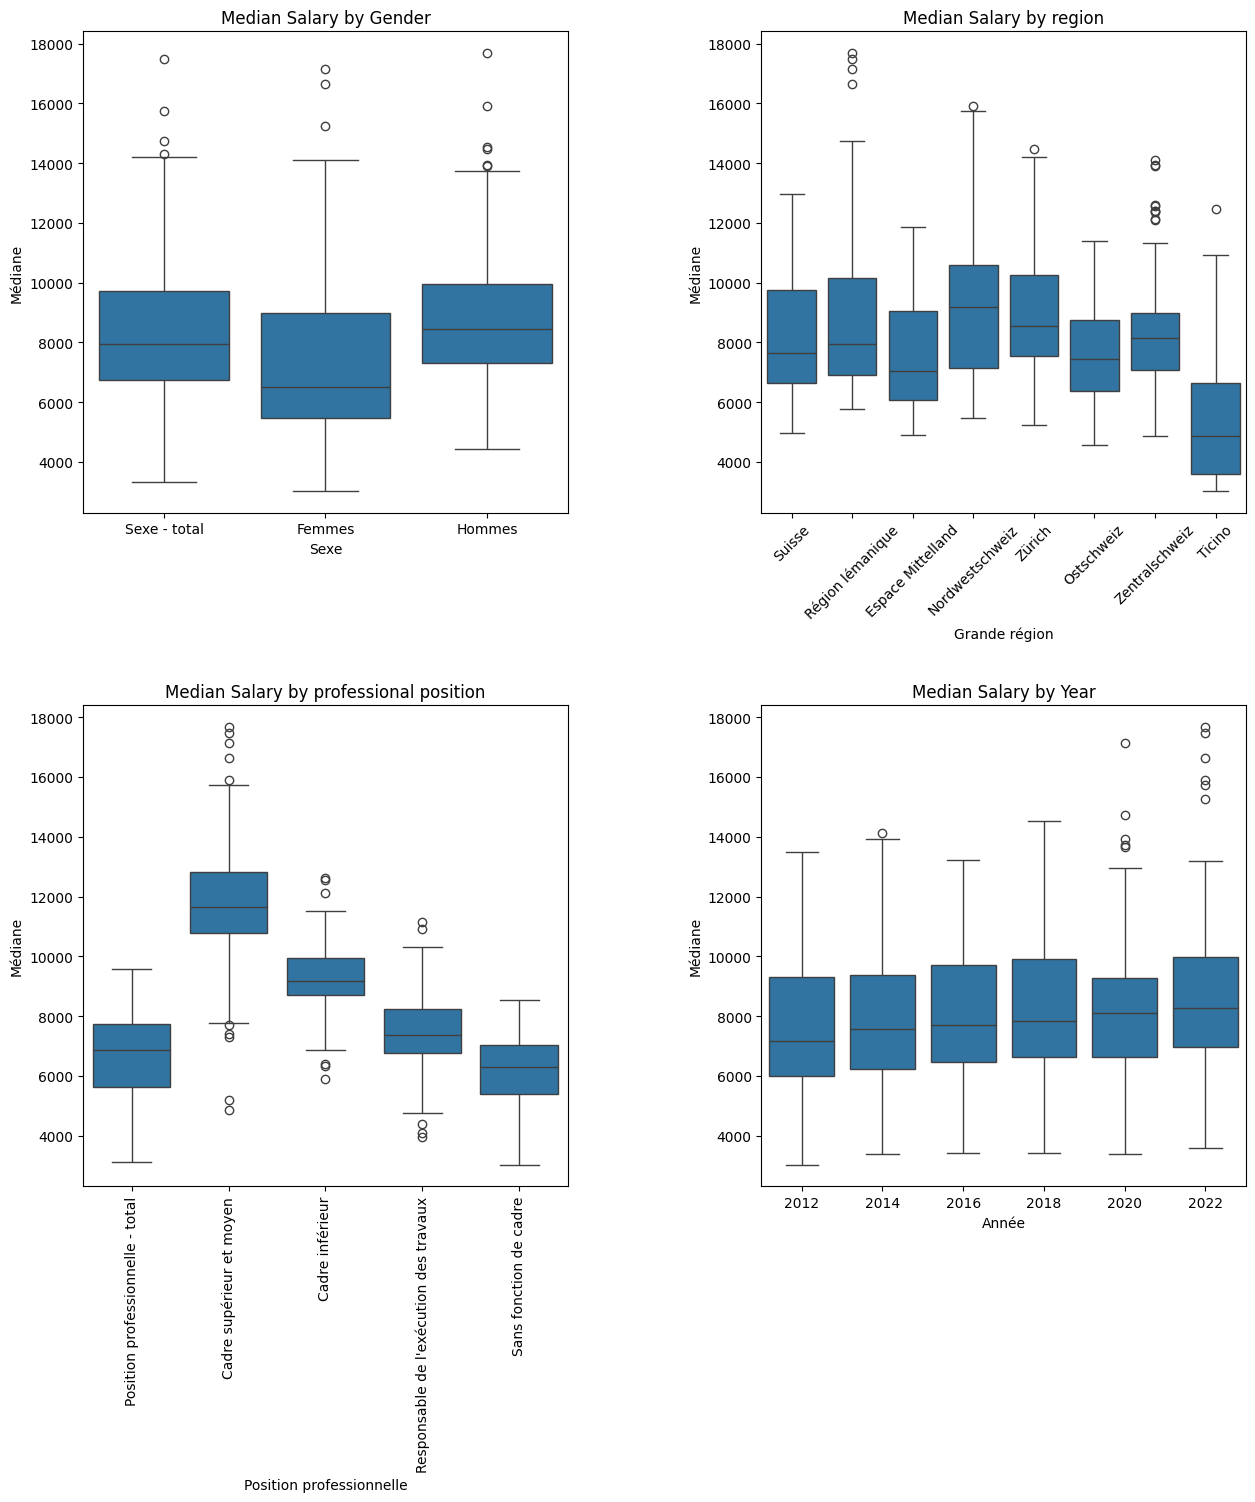

In [41]:
# Median values exploration
# make subplot for 4 plots
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(2, 2, 1)
sns.boxplot(data=df26, x="Sexe", y="Médiane")
plt.title("Median Salary by Gender")
plt.subplot(2, 2, 2)
sns.boxplot(data=df26, x="Grande région", y="Médiane")
plt.title("Median Salary by region")
plt.xticks(rotation=45)
plt.subplot(2,2,3)
sns.boxplot(data=df26, x="Position professionnelle", y="Médiane")
plt.title("Median Salary by professional position")
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(data=df26, x="Année", y="Médiane")
plt.title("Median Salary by Year")



## Feature Engineering

In [ ]:
df26_columns = df26.columns.tolist()
df26_columns = df26_columns[0:6]

In [42]:
# calculating inequality for each case
# 1. find indexes i of all 'Femmes'
# 2. compute inequality percentage by makein inequality[i] = médiane[i](femmes) / médiane [i+1](hommes)

# put this in a function 'inequality(df26)'

pivot_df26 = df26.pivot_table(
    index=['Grande région', 'Année', 'Position professionnelle'],
    columns='Sexe',
    values='Médiane'
).reset_index()
pivot_df26.drop(columns=['Sexe - total'],inplace=True)
pivot_df26['inequality_%'] = ((pivot_df26['Femmes'] / pivot_df26['Hommes']) * 100 - 100).round(2)




In [ ]:
# looping this over all df26's
# for df26 in [list of df26s]
#     inequality(df26)